*Use LogReg to help with cancer prediction*

- Exploring the data
- Visualizing the data

**Predicting Diagnosis: Working up to Logistic Regression using 4 approaches**

- Approach 1: Linear Regression classifier

- Approach 2: Simple boundary classifier

- Approach 3: Modifying with logistic regression

- Approach 4: Multiple feature logistic regression





# Exploring our data


In [105]:
# prompt: load cancer.csv

import pandas as pd
df = pd.read_csv('cancer.csv')


 ## Looking at our dataset

 A key step in machine learning (and coding in general!) is to view the structure and dimensions of our new dataframe, which stores all our training data from the tumor biopsies. You can think of dataframes like Google or Microsoft Excel spreadsheets (large tables with row/column headers).

We want to confirm that the size of our table is correct, check out the features present, and get a more visual sense of what it looks like overall.

In [106]:
dataframe.head(4)


,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat,predicted
0,1,122.80,17.99,10.38,1001.0,0.11840,0.3001,0.2419,1 (malignant),0
1,1,132.90,20.57,17.77,1326.0,0.08474,0.0869,0.1812,1 (malignant),13
2,1,130.00,19.69,21.25,1203.0,0.10960,0.1974,0.2069,1 (malignant),13
3,1,77.58,11.42,20.38,386.1,0.14250,0.2414,0.2597,1 (malignant),0


Heres what every column means.

* <u><b><i>diagnosis</u></b></i>: Whether the tumor was diagnosed as malignant (1) or benign (0).
* <u><b><i>perimeter_mean</u></b></i>: The average perimeter of cells in that particular biopsy
* <u><b><i>radius_mean</u></b></i>: The average radius of cells in that particular biopsy
* <u><b><i>texture_mean</u></b></i>: The average texture of cells in that particular biopsy
* <u><b><i>area_mean</u></b></i>: The average area of cells in that particular biopsy
* <u><b><i>smoothness_mean</u></b></i>: The average smoothness of cells in that particular biopsy
* <u><b><i>concavity_mean</u></b></i>: The average concavity of cells in that particular biopsy
* <u><b><i>symmetry_mean</u></b></i>: The average symmetry of cells in that particular biopsy

Recall that the term mean refers to taking an average (summing the values for each cell and dividing by the total number of cells observed in that biopsy).

In [78]:
# Next, we'll use the 'info' method to see the data types of each column
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   diagnosis        569 non-null    int64   
 1   perimeter_mean   569 non-null    float64 
 2   radius_mean      569 non-null    float64 
 3   texture_mean     569 non-null    float64 
 4   area_mean        569 non-null    float64 
 5   smoothness_mean  569 non-null    float64 
 6   concavity_mean   569 non-null    float64 
 7   symmetry_mean    569 non-null    float64 
 8   diagnosis_cat    569 non-null    category
 9   predicted        569 non-null    int64   
dtypes: category(1), float64(7), int64(2)
memory usage: 40.8 KB


In [79]:
#null values are bad, if we have some, we will use data manipulation to make them disappear
dataframe.isnull().sum()


diagnosis          0
perimeter_mean     0
radius_mean        0
texture_mean       0
area_mean          0
smoothness_mean    0
concavity_mean     0
symmetry_mean      0
diagnosis_cat      0
predicted          0
dtype: int64

In [80]:

dataframe['diagnosis'].nunique()


2

 ## Visualizing our dataset


In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat,predicted
0,1,122.80,17.99,10.38,1001.0,0.11840,0.3001,0.2419,1 (malignant),0
1,1,132.90,20.57,17.77,1326.0,0.08474,0.0869,0.1812,1 (malignant),13
2,1,130.00,19.69,21.25,1203.0,0.10960,0.1974,0.2069,1 (malignant),13
3,1,77.58,11.42,20.38,386.1,0.14250,0.2414,0.2597,1 (malignant),0
4,1,135.10,20.29,14.34,1297.0,0.10030,0.1980,0.1809,1 (malignant),13


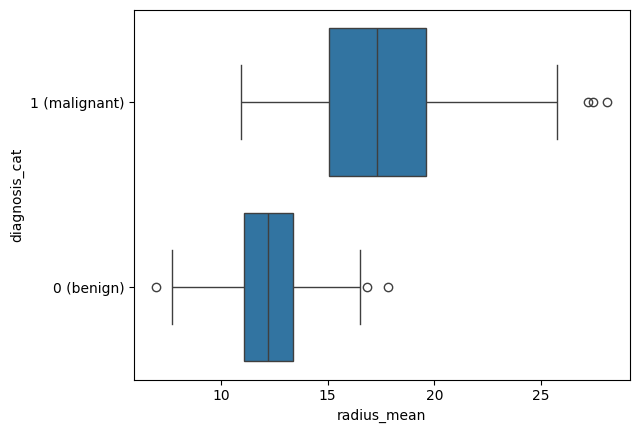

In [82]:
sns.boxplot(x = 'radius_mean', y = 'diagnosis_cat', data = dataframe, order=['1 (malignant)', '0 (benign)'])
dataframe.head()

<Axes: xlabel='radius_mean', ylabel='diagnosis_cat'>

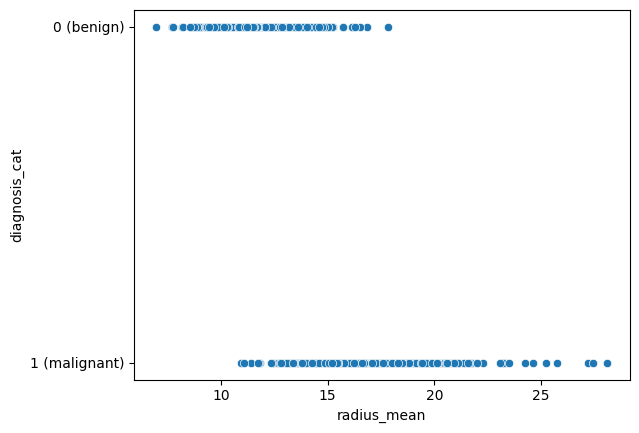

In [83]:
sns.scatterplot(x='radius_mean', y='diagnosis_cat', data=dataframe)


# Predicting Diagnosis

Let's start by predicting a diagnosis using a single feature: radius mean.


## Approach 1: Can we use linear regression to classify these cells?




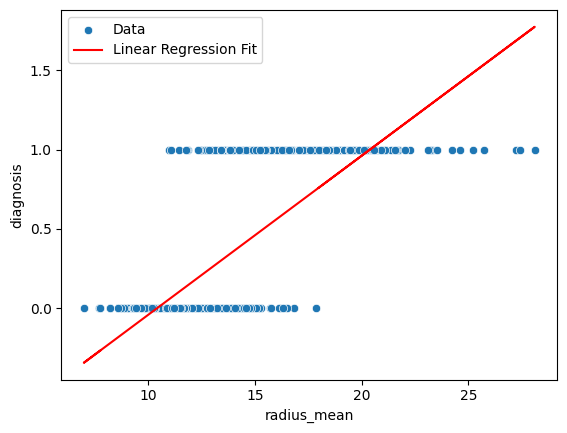

In [103]:
#@title Run this to fit and visualize a linear regression (double-click to see code!)
from sklearn import linear_model

X,y = dataframe[['radius_mean']], dataframe[['diagnosis']]

model = linear_model.LinearRegression()
model.fit(X, y)
preds = model.predict(X)

sns.scatterplot(x='radius_mean', y='diagnosis', data=dataframe)
plt.plot(X, preds, color='r')
plt.legend([ 'Data', 'Linear Regression Fit'])

In [ ]:
#@title Make Sure you know what your doing
#@markdown What does a diagnosis of 0.0 mean?
diagnosis_0 = "Choose An Answer" #@param ["Malignant", "Benign", "Choose An Answer"]

#@markdown What does a diagnosis of 1.0 mean?
diagnosis_1 = "Choose An Answer" #@param ["Malignant", "Benign", "Choose An Answer"]

#@markdown What does the model predict for radius_mean = 20?
radius_mean_20 = "Choose An Answer" #@param ["Malignant", "Benign", "Choose An Answer"]

#@markdown What does the model predict for radius_mean = 11?
radius_mean_11 = "Choose An Answer" #@param ["Malignant", "Benign", "Choose An Answer"]

if diagnosis_0 == 'Benign' and diagnosis_1 == 'Malignant':
  print("Correct! 0.0 is a benign prediction and 1.0 is malignant.")
else:
  print("One or both of our diagnoses' interpretations is incorrect. Try again!")

if radius_mean_20 == 'Malignant':
  print("Correct! Our model would predict that a biopsy with radius_mean = 20 is malignant.")
else:
  print("That's not quite what our model would predict for radius_mean = 20. Try again!")

if radius_mean_11 == 'Benign':
  print("Correct! Our model would predict that a biopsy with radius_mean = 11 is benign.")
else:
  print("That's not quite what our model would predict for radius_mean = 11. Try again!")

Simple Boundary Classifier
The variable we are trying to predict is categorical, not continuous! So we can't use a linear regression; we have to use a classifier.


### Classification is just drawing boundaries.

The simplest approach to classification is just drawing a boundary. Let's pick a boundary value for the radius mean and see how well it separates the data.

In [ ]:
#@title Choose a value for your boundary line and click play!

#@markdown Double-click this cell to see the plotting code.
target_boundary = 14 #@param {type:"slider", min:5, max:30, step:0.5}

sns.boxplot(x = 'radius_mean', y = 'diagnosis_cat', data = dataframe, order=['1 (malignant)', '0 (benign)'])
plt.plot([target_boundary, target_boundary], [-.2, 1.2], 'g', linewidth = 2)

### Building the boundary classifier

Here we build a boundary classifier function that takes in a **target boundary**: a particular value of radius mean. This function will take in a boundary value of our choosing and then classify the data points based on whether or not they are above or below the boundary.

**Exercise: Write a function to implement a boundary classifier.** You'll take in a `target_boundary` (a `float` or `int` like 15) and a `radius_mean_series` (a list of values) and return a list of predictions!

In [ ]:
def boundary_classifier(target_boundary, radius_mean_series):
  predictions = []

  for radius_mean in radius_mean_series:
    if radius_mean > target_boundary:
      predictions.append(13)
    else:
     predictions.append(0)


  return predictions

The code below chooses a boundary and runs your classifier.

In [ ]:
#@title Choose a value for your boundary line and click play to see your classifier at work!

#@markdown Double-click this cell to see the code for `y_pred` and `y_true`.
chosen_boundary = 19 #@param {type:"slider", min:5, max:30, step:0.5}

y_pred = boundary_classifier(chosen_boundary, dataframe['radius_mean'])
dataframe['predicted'] = y_pred

y_true = dataframe['diagnosis']

sns.catplot(x = 'radius_mean', y = 'diagnosis_cat', hue = 'predicted', data = dataframe, order=['1 (malignant)', '0 (benign)'])
plt.plot([chosen_boundary, chosen_boundary], [-.2, 1.2], 'g', linewidth = 2)

What do you think of the results based on the graph?

We can take a look at `y_true` and `y_pred` - how similar do they look?

In [ ]:
print (list(y_true))
print (y_pred)

Let's calculate our accuracy!

In [ ]:
accuracy = accuracy_score(y_true,y_pred)
print(accuracy)

Logistic Regression - using machine learning to determine the optimal boundary



Now, it's time to move away from our simple guess-and-check model and work towards implementing an approach that can automatically find a better separation. One of the most common methods for this is called 'Logistic Regression'.

### Training Data vs Test Data

We'll split up our data set into groups called 'train' and 'test'. We teach our 'model' the patterns using the train data, but the whole point of machine learning is that our prediction should work on 'unseen' data or 'test' data.

The function below does this for you.


In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(dataframe, test_size = 0.2, random_state = 1)

In [ ]:
print('Number of rows in training dataframe:', train_df.shape[0])
train_df.head()

In [ ]:
print('Number of rows in test dataframe:', test_df.shape[0])
test_df.head()

### Single Variable Logistic Regression


In [ ]:
X = ['radius_mean']
y = 'diagnosis'

X_train = train_df[X]
print('X_train, our input variables:')
print(X_train.head())
print()

y_train = train_df[y]
print('y_train, our output variable:')
print(y_train.head())

Now, let's prepare our model (we haven't trained it yet):

In [ ]:
# Import the necessary module
from sklearn import linear_model

# Now you can create your logistic regression model
logreg_model = linear_model.LogisticRegression()

###Making Predictions

Next, we want to tell our `logreg_model` object to take in our inputs (X) and our true labels (y) and fit a line that predicts y from X.




In [ ]:
logreg_model.fit(X_train,y_train)


Testing

In [ ]:
X_test = test_df[X]
y_test = test_df[y]

### Making predictions on our test set

Next, we need to figure out what our line thinks the diagnosis is based on our data points


In [ ]:
y_pred = logreg_model.predict(X_test)


Run the code below to visualize the results!

In [ ]:
test_df['predicted'] = y_pred
sns.catplot(x = 'radius_mean', y = 'diagnosis_cat', hue = 'predicted', data=test_df, order=['1 (malignant)', '0 (benign)'])

### Finally, let's evaluate the accuracy of our model.

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

## What is logistic regression doing? It's giving 'soft' predictions!


In [ ]:

y_prob = logreg_model.predict_proba(X_test)
X_test_view = X_test[X].values.squeeze()
plt.xlabel('radius_mean')
plt.ylabel('Predicted Probability')
sns.scatterplot(x = X_test_view, y = y_prob[:,1], hue = y_test, palette=['purple','green'])

First let's print out one row of our table so we can see what other features we have available to us.


In [ ]:
dataframe.head(1)

## Can we use multiple features together to do even better?
So far, we've just been using `radius_mean` to make predictions. But there's lots of other potentially important features that we could be using!

Let's take a look again:

In [ ]:
dataframe.head(1)

### Logistic Regression with Multiple Features

Accuracy: 0.88


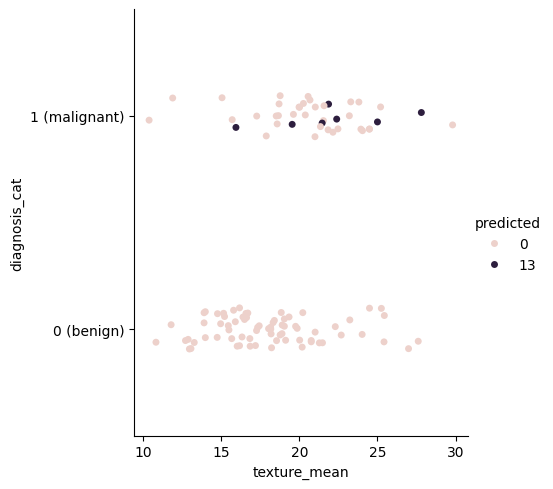

In [85]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns


train_df, test_df = train_test_split(dataframe, test_size=0.2, random_state=1)

X = ['perimeter_mean', 'texture_mean', 'symmetry_mean']
y = 'diagnosis'

X_train = train_df[X]
y_train = train_df[y]
X_test = test_df[X]
y_test = test_df[y]

logreg_model = LogisticRegression()

logreg_model.fit(X_train, y_train)  # Call fit on the model instance

# Predict on the test data
y_pred = logreg_model.predict(X_test)  # Use logreg_model for prediction


# Visualize results (adjust as needed)
sns.catplot(x='texture_mean', y='diagnosis_cat', hue='predicted',
            data=test_df, order=['1 (malignant)', '0 (benign)'])

print(f'Accuracy: {accuracy:.2f}')

Logistic Regression can learn an optimal classification boundary by using multiple features together, which can improve its prediction accuracy even more!

 What makes a separation good?

We know our overall accuracy, so we know how many errors we make overall. Errors however come in two kinds:

- **False positives:** The model predicts that a sample is malignant (positive), but it's actually benign.

- **False negatives:** The model predicts that a sample is benign (negative), but it's actually malignant.

###Confusion Matrices
Next, let's evaluate the performance of our model quantitatively. We can visualize statistics on the number of correct vs. incorrect predictions using a confusion matrix that shows the following:

![Confusion Matrix](https://miro.medium.com/max/860/1*7EcPtd8DXu1ObPnZSukIdQ.png)

where the terms mean:

* **TP (True Positive)** = The model predicted positive (malignant in our case, since malignant has a label of 1) and it’s true.
* **TN (True Negative)** = The model predicted negative (benign in our case, since benign has a label of 0) and it’s true.
* **FP (False Positive)** = The model predicted positive and it’s false.
* **FN (False Negative)** = The model predicted negative and it’s false.

Text(0.5, 427.9555555555555, 'Predicted diagnosis')

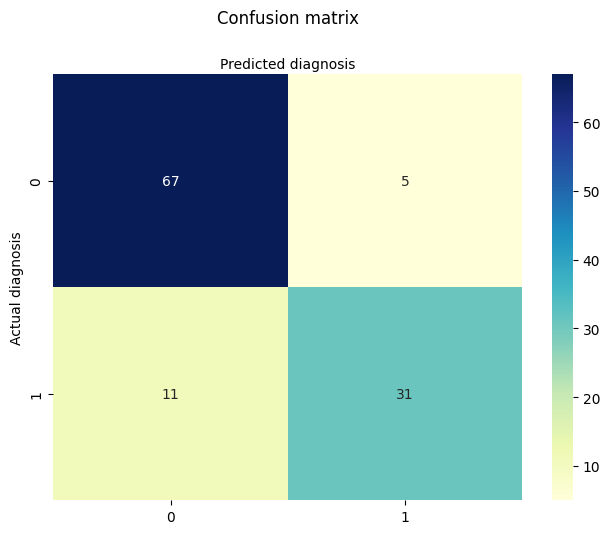

In [100]:
#@title Making and visualizing Matrices


# Import the metrics class
from sklearn import metrics

# Create the Confusion Matrix
# y_test = dataframe['diagnosis']
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Visualizing the Confusion Matrix
class_names = [0,1] # Our diagnosis categories

fig, ax = plt.subplots()
# Setting up and visualizing the plot (do not worry about the code below!)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') # Creating heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual diagnosis')
plt.xlabel('Predicted diagnosis')

In [94]:
#@title Fun MCQ:

#@markdown What are the values in the top left (0, 0)?
top_left = "Choose an Answer" #@param ["True Positives", "True Negatives", "False Positives", "False Negatives", "Choose an Answer"]

#@markdown What are the values in the bottom right (1, 1)?
bottom_right = "Choose an Answer" #@param ["True Positives", "True Negatives", "False Positives", "False Negatives", "Choose an Answer"]

#@markdown What are the values in the top right (1, 0)?
top_right = "Choose an Answer" #@param ["True Positives", "True Negatives", "False Positives", "False Negatives", "Choose an Answer"]

#@markdown What are the values in the bottom left (0, 1)?
bottom_left = "Choose an Answer" #@param ["True Positives", "True Negatives", "False Positives", "False Negatives", "Choose an Answer"]

if top_left == "True Negatives" and bottom_right == "True Positives":
  print("Correct! Our results are True if our model is correct!")
else:
  print("One or both of our (0, 0) and (1, 1) interpretations is incorrect. Try again!")

if top_right == "False Positives":
  print("Correct! A false positive is when our model predicts that a sample is malignant when it's actually benign.")
else:
  print("That's not quite what (1, 0) values are. Try again!")

if bottom_left == "False Negatives":
  print("Correct! A false negative is when our model predicts that a sample is benign when it's actually malignant.")
else:
  print("That's not quite what (0, 1) values are. Try again!")

One or both of our (0, 0) and (1, 1) interpretations is incorrect. Try again!
That's not quite what (1, 0) values are. Try again!
That's not quite what (0, 1) values are. Try again!


Choosing a Metric

Depending on the situation, we might measure success in different ways. For example, we might use:

- **Accuracy:** What portion of our predictions are right?

- **Precision:** What portion of our positive predictions are actually positive?

- **Recall:** What portion of the actual positives did we identify?



What metric is best?

To calculate any of these, we can use the numbers from our confusion matrix:

In [95]:
print (cnf_matrix)
(tn, fp), (fn, tp) = cnf_matrix
print ("TN, FP, FN, TP:", tn, fp, fn, tp)

[[67  5]
 [11 31]]
TN, FP, FN, TP: 67 5 11 31



 Decision Trees Machine Learning


In [101]:
#@title Create the ML model { display-mode: "both" }
from sklearn import tree

# We'll first specify what model we want, in this case a decision tree
class_dt = tree.DecisionTreeClassifier(max_depth=3)

# We use our previous `X_train` and `y_train` sets to build the model
class_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'x[0] <= 98.755\ngini = 0.468\nsamples = 455\nvalue = [285, 170]'),
 Text(0.25, 0.625, 'x[0] <= 89.995\ngini = 0.213\nsamples = 314\nvalue = [276, 38]'),
 Text(0.125, 0.375, 'x[0] <= 85.25\ngini = 0.108\nsamples = 263\nvalue = [248, 15]'),
 Text(0.0625, 0.125, 'gini = 0.046\nsamples = 214\nvalue = [209, 5]'),
 Text(0.1875, 0.125, 'gini = 0.325\nsamples = 49\nvalue = [39, 10]'),
 Text(0.375, 0.375, 'x[1] <= 19.75\ngini = 0.495\nsamples = 51\nvalue = [28, 23]'),
 Text(0.3125, 0.125, 'gini = 0.337\nsamples = 28\nvalue = [22, 6]'),
 Text(0.4375, 0.125, 'gini = 0.386\nsamples = 23\nvalue = [6, 17]'),
 Text(0.75, 0.625, 'x[1] <= 16.395\ngini = 0.12\nsamples = 141\nvalue = [9, 132]'),
 Text(0.625, 0.375, 'x[0] <= 117.4\ngini = 0.486\nsamples = 12\nvalue = [7, 5]'),
 Text(0.5625, 0.125, 'gini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.875, 0.375, 'x[2] <= 0.15\ngini = 0.031\nsamples = 129\nvalue = [2, 127]'

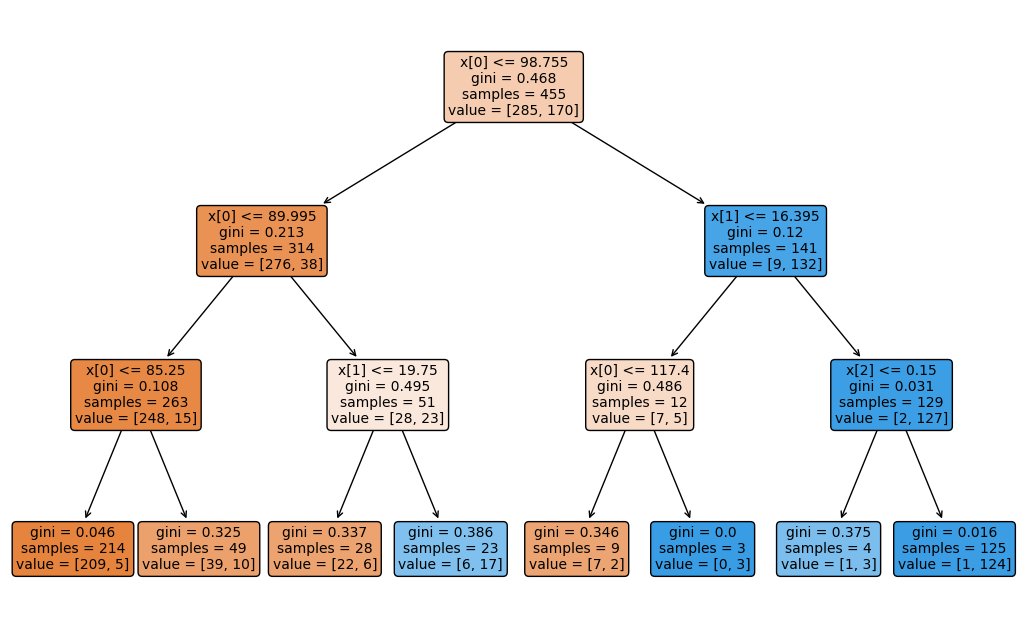

In [102]:
#@title Visualize and interpret the tree
plt.figure(figsize=(13, 8))
tree.plot_tree(class_dt,
               filled=True,
               rounded=True,
               fontsize=10,)

In [98]:
#@title Find the predictions based on the model { display-mode: "both" }
y_pred = class_dt.predict(X_test)

In [99]:
#@title Calculate model performance { display-mode: "both" }
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))

Accuracy:  0.8596491228070176
Precision:  0.8611111111111112
Recall:  0.7380952380952381
